In [1]:
def plot_this(s,title=''):
    """

    """
    import pylab
    s = s.squeeze()
    if s.ndim ==1:
        pylab.plot(s)
    else:
        pylab.imshow(s,aspect='auto')
        pylab.title(title)
    pylab.show()

import torch 
def calculate_scaling_factor(clean_audio, noise_audio, target_snr):
    """Calculate the scaling factor to adjust noise to the target SNR level."""
    target_snr = float(target_snr)
    clean_power = torch.mean(clean_audio**2)
    noise_power = torch.mean(noise_audio**2)
    desired_noise_power = clean_power / (10 ** (target_snr / 10))
    scaling_factor = torch.sqrt(desired_noise_power / noise_power)
    return scaling_factor

In [2]:
import torch
import torchaudio
noise1 = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o2_net18/noises/noise_fileid_6.wav"
noise_1, sr = torchaudio.load(noise1)
noise_1.shape
noise2 = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o2_net18/noises/noise_fileid_18.wav"
noise_2, sr = torchaudio.load(noise2)
noise_2.shape

torch.Size([1, 4699904])

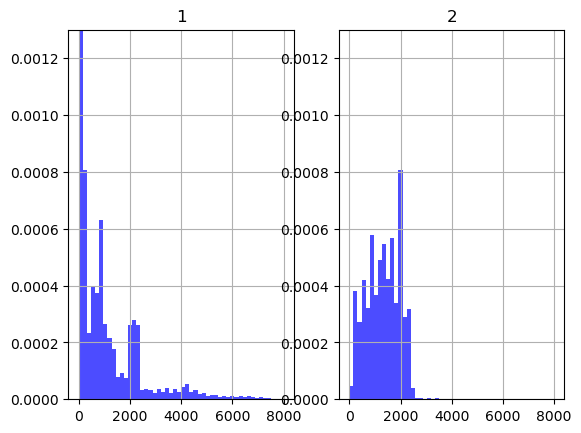

In [3]:
import scipy.signal as signal
from matplotlib import pyplot as plt

freqs1, magnitudes1 = signal.welch(noise_1.squeeze().cpu().detach().numpy(), fs=16000)
freqs, magnitudes = signal.welch(noise_2.squeeze().detach().cpu(), fs=16000)
limit = 0.0013
figure, axis = plt.subplots(1,2)
axis[0].hist(freqs1, bins=50, weights=magnitudes1, density=True, color='b', alpha=0.7)
axis[0].set_title('1')
axis[0].grid(True)
axis[0].set_ylim(0.0, limit)
axis[1].hist(freqs, bins=50, weights=magnitudes, density=True, color='b', alpha=0.7)
axis[1].set_title('2')
axis[1].grid(True)
axis[1].set_ylim(0.0, limit)

plt.show()

In [4]:
clean1 = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o2_net18/clean_wav/LJ050-0275_fileid_6.wav"
clean_1, sr = torchaudio.load(clean1)
torch.mean(clean_1**2)

tensor(0.0036)

In [9]:
clean2 = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o_net3_2/6/clean_wav/noise6_book_buccaneer1_snr5_fileid_6.wav"
clean_2, sr = torchaudio.load(clean2)
torch.mean(clean_2**2)

tensor(0.0013)

In [ ]:
factor1 =  calculate_scaling_factor(clean_1, noise_1, 5)
factor2 =  calculate_scaling_factor(clean_2, noise_2, 5)
factor1, factor2

In [6]:
noisy1 =  "/data/ephraim/datasets/known_noise/undiff_exps/exp_o2_net18/noisy_wav/LJ050-0275_snr5_fileid_6.wav"
noisy2 = 

SyntaxError: invalid syntax (1789848201.py, line 2)

In [7]:
mine = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o_net17/clean_wav/clean_fileid_18.wav"
mine, sr = torchaudio.load(mine)
torch.mean(mine**2)

tensor(0.0012)

In [27]:
aplified = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o_net3_6_amplified_3/6/clean_wav/noise6_book_buccaneer1_snr5_fileid_6.wav"
aplified, sr = torchaudio.load(aplified)
torch.mean(aplified**2)

tensor(0.0118)

(tensor(0.4536), tensor(0.0892))

100%|██████████| 111/111 [06:34<00:00,  3.56s/it]


mean, std: 0.002630104328707026 0.0019539812329330366


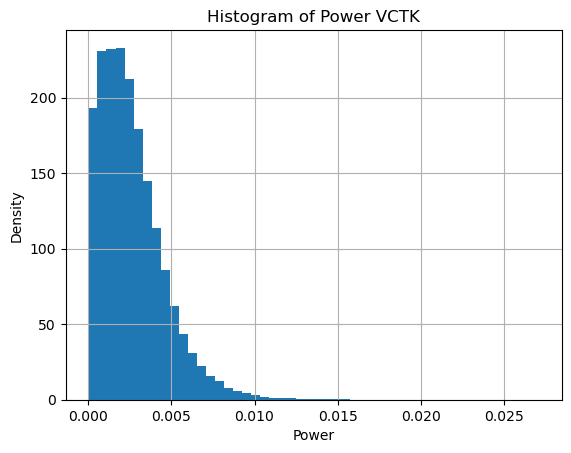

In [34]:
import os
from tqdm import tqdm
vctk = "/data/ephraim/datasets/vctk/VCTK-Corpus-0.92/wav48_silence_trimmed/p376/"
vctk_root = "/data/ephraim/datasets/vctk/VCTK-Corpus-0.92/wav48_silence_trimmed/"
powers = []
for d in tqdm(os.listdir(vctk_root)):
    if os.path.isdir(os.path.join(vctk_root, d)):
        vctk = os.path.join(vctk_root, d)

        files = os.listdir(vctk)

        for f in files:
            if f.endswith(".flac"):
                wav, sr = torchaudio.load(os.path.join(vctk, f))
                powers.append(torch.mean(wav**2).item())

#calc std and mean for the power
import numpy as np
mean = np.mean(powers)
std = np.std(powers)
print("mean, std:",mean, std)
#plot the histogram
plt.hist(powers, bins=50, density=True)
plt.title('Histogram of Power VCTK')
plt.xlabel('Power')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

data = powers # Replace with your data

# Range
data_range = np.max(data) - np.min(data)

# Interquartile Range (IQR)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Standard Deviation
std_dev = np.std(data)

# Five-Number Summary
five_number_summary = {
    'Minimum': np.min(data),
    'Q1': q1,
    'Median': np.median(data),
    'Q3': q3,
    'Maximum': np.max(data)
}

print(f"Range: {data_range}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std_dev}")
print("Five-Number Summary:", five_number_summary)

Range: 0.027148655712153413
IQR: 0.0024473022494930774
Standard Deviation: 0.0019539812329330366
Five-Number Summary: {'Minimum': 9.76860974333249e-07, 'Q1': 0.0011770979908760637, 'Median': 0.0022505606757476926, 'Q3': 0.003624400240369141, 'Maximum': 0.027149632573127747}


In [25]:
# Compute the median
median = np.median(data)

# Compute the median absolute deviation (MAD)
mad = np.median(np.abs(data - median))

# Compute the modified Z-scores
modified_z_scores = 0.6745 * (0.01 - median) / mad

print("Modified Z-scores:", modified_z_scores)

Modified Z-scores: 4.387967648198827


In [23]:
len(powers)

88328

13097


mean, std: 0.004386842364678159 0.0012897568584185693


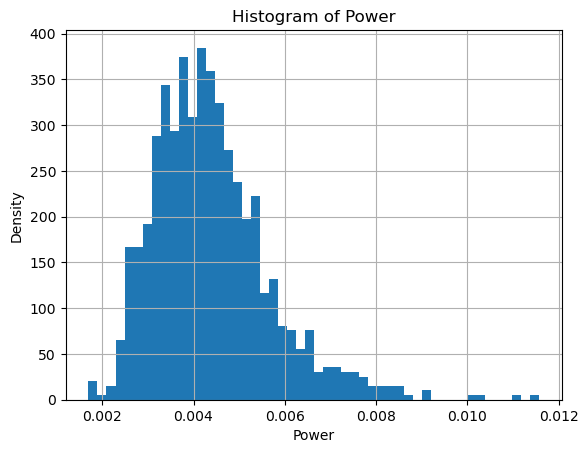

In [7]:
import os
LJSpeech = "/data/ephraim/datasets/LJSpeech-1.1/wavs/"
files = os.listdir(LJSpeech)
print(len(files))
powers2 = []
counter=0
for f in files:
    if f.endswith(".wav"):
        counter+=1
        if counter > 1000:
            break
        wav, sr = torchaudio.load(os.path.join(LJSpeech, f))
        powers2.append(torch.mean(wav**2).item())

#calc std and mean for the power
import numpy as np
mean2 = np.mean(powers2)
std2 = np.std(powers2)
print("mean, std:",mean2, std2)
#plot the histogram
plt.hist(powers2, bins=50, density=True)
plt.title('Histogram of Power')
plt.xlabel('Power')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [8]:
import numpy as np

data = powers2 # Replace with your data

# Range
data_range = np.max(data) - np.min(data)

# Interquartile Range (IQR)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Standard Deviation
std_dev = np.std(data)

# Five-Number Summary
five_number_summary = {
    'Minimum': np.min(data),
    'Q1': q1,
    'Median': np.median(data),
    'Q3': q3,
    'Maximum': np.max(data)
}

print(f"Range: {data_range}")
print(f"IQR: {iqr}")
print(f"Standard Deviation: {std_dev}")
print("Five-Number Summary:", five_number_summary)

Range: 0.009877186501398683
IQR: 0.0015572439879179
Standard Deviation: 0.0012897568584185693
Five-Number Summary: {'Minimum': 0.001697855768725276, 'Q1': 0.003475857200101018, 'Median': 0.004217170178890228, 'Q3': 0.005033101188018918, 'Maximum': 0.011575042270123959}


In [6]:
import torchaudio
import torch
old = "/data/ephraim/datasets/known_noise/undiff_exps/exp_o4_net18/clean_wav/LJ050-0271_fileid_18.wav"
old, sr = torchaudio.load(old)
new = "/data/ephraim/datasets/known_noise/undiff_exps2/exp_p5_net1/clean_wav/SX137_fileid_18.wav"
new, sr = torchaudio.load(new)
old_power = torch.mean(old**2)
new_power = torch.mean(new**2)
def calculate_scaling_factor(clean_audio, noise_audio, target_snr):
    """Calculate the scaling factor to adjust noise to the target SNR level."""
    target_snr = float(target_snr)
    clean_power = torch.mean(clean_audio**2)
    noise_power = torch.mean(noise_audio**2)
    desired_noise_power = clean_power / (10 ** (target_snr / 10))
    scaling_factor = torch.sqrt(desired_noise_power / noise_power)
    return scaling_factor
calculate_scaling_factor(old, new, 0)

tensor(5.6006)

In [7]:
import audio_tools2
from audio_tools2  import *
def calc_vad(f, verbose=False):
    test_file=f
    fs,s = read_wav(test_file)
    win_len = int(fs*0.025)
    hop_len = int(fs*0.010)
    sframes = audio_tools2.enframe(s,win_len,hop_len) # rows: frame index, cols: each frame
    if verbose:
        plot_this(compute_log_nrg(sframes))

    # percent_high_nrg is the VAD context ratio. It helps smooth the
    # output VAD decisions. Higher values are more strict.
    percent_high_nrg = 0.5

    vad = nrg_vad(sframes,percent_high_nrg)

    if verbose:
        plot_these(deframe(vad,win_len,hop_len),s)
    return deframe(vad,win_len,hop_len) 

In [10]:
working = "/data/ephraim/datasets/known_noise/undiff_exps2/exp_p5_net1/clean_wav/SX137_fileid_18.wav"
speech_w, sr = torchaudio.load(working)

vaded_signal = calc_vad(working)[0:speech_w.shape[1],:]
print("vaded_signal: ", vaded_signal)
vaded_signal_torch = (speech_w[0][vaded_signal.T[0]>0])
vaded_signal_torch = torch.unsqueeze(vaded_signal_torch, dim=0)
# raise Exception
clean_power2 = float( 1 / vaded_signal_torch.shape[1] * torch.sum(vaded_signal_torch**2))
print("clean_power: ", clean_power2)
simple_power2 =  1 / speech_w.shape[1] * torch.sum(speech_w**2)
print("simple_power: ", simple_power2)

ValueError: File format b'NIST' not understood. Only 'RIFF' and 'RIFX' supported.